In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from matplotlib import cm

viridis = cm.get_cmap('viridis', 12)

# Load the data
with open('monte_carlo_individual.pkl', 'rb') as f:
    monte_carlo_individual = pickle.load(f)

with open('monte_carlo_dict.pkl', 'rb') as f:
    monte_carlo_dict = pickle.load(f)

storage_label = 0
liquefaction_label = 1
electrolysis_label = 2
transportation_label = 3
excavation_label = 4
beneficiation_label = 5
hydrogen_reduction_label = 6

ilmenite_wt = np.linspace(1, 15, 61)

# Storage, Liquefaction, Electrolysis, Transportation, Excavation, Beneficiation, Reactor

process_indexes = [storage_label, liquefaction_label, electrolysis_label, transportation_label, excavation_label, beneficiation_label, hydrogen_reduction_label]
process_labels = ['Storage', 'Liquefaction', 'Electrolysis', 'Transportation', 'Excavation', 'Beneficiation', 'Hydrogen reduction']
colors_bars = ["orange", "red", "grey", viridis(
        0.2), viridis(0.45),  viridis(0.6), viridis(0.95)]

process_colors = [viridis(0.95), viridis(0.6), viridis(0.45), 'red', 'orange', 'grey', viridis(0.2)]
process_parameters = {
    'Excavation': ['cohCoeff', 'intAngle', 'extAngle'],
    'Transportation': ['motor_efficiency', 'mRover'],
    'Beneficiation': ['enrichment_factor', 'benef_ilmenite_recovery'],
    'Hydrogen reduction': ['batch_reaction_time_in_hours', 'CFI_thickness', 'HTMLI_thickness', 'delta_T_insulation', 'reactor_heat_up_time_in_hours', 'T_regolith_in', 'T_pre_heater', 'enrichment_factor', 'benef_ilmenite_recovery'],
    'Electrolysis': ['system_efficiency'],
    'Liquefaction': ['cryocooler_efficiency', 'T_hot_reservoir_carnot_cycle', 'T_of_incoming_oxygen'],
    'Storage': ['vip_thickness', 'vip_thermal_conductivity', 'vip_emissivity', 'cryocooler_efficiency_storage']
    }

In [2]:
# X = excavation
# T = transportation
# B = beneficiation
# R = reactor
# E = electrolysis
# L = liquefaction
# S = storage

In [3]:
def find_new_label_name(label):
    if label == 'cryocooler_efficiency':
        new_label = 'Cryocooler efficiency'
    elif label == 'T_hot_reservoir_carnot_cycle':
        new_label = r'$T$ (Hot reservoir)'
    elif label == 'T_of_incoming_oxygen':
        new_label = r'$T$ (Incoming oxygen)'
    elif label == 'enrichment_factor':
        new_label = 'Enrichment factor'
    elif label == 'system_efficiency':
        new_label = 'System efficiency'        
    elif label == 'batch_reaction_time_in_hours':
        new_label = 'Batch reaction time (hours)'
    elif label == 'CFI_thickness':
        new_label = 'CFI thickness (m)'
    elif label == 'HTMLI_thickness':
        new_label = 'HTMLI thickness (m)'
    elif label == 'delta_T_insulation':
        new_label = r'$\Delta T$ (Insulation)'
    elif label == 'reactor_heat_up_time_in_hours':
        new_label = 'Reactor heat up time (hours)'
    elif label == 'T_regolith_in':
        new_label = r'$T$ (Regolith in)'
    elif label == 'T_pre_heater':
        new_label = r'$T$ (Pre-heater)'
    elif label == 'benef_ilmenite_recovery':
        new_label = 'Ilmenite recovery (%)'
    elif label == 'vip_thickness':
        new_label = 'VIP thickness (m)'
    elif label == 'vip_thermal_conductivity':
        new_label = r'VIP thermal conductivity'
    elif label == 'vip_emissivity':
        new_label = 'VIP emissivity'
    elif label == 'cryocooler_efficiency_storage':
        new_label = 'Cryocooler efficiency'
    elif label == 'motor_efficiency':
        new_label = 'Motor efficiency'
    elif label == 'mRover':
        new_label = 'Rover mass (kg)'
    elif label == 'cohCoeff':
        new_label = 'Cohesion coefficient'
    elif label == 'intAngle':
        new_label = 'Internal angle of friction'
    elif label == 'extAngle':
        new_label = 'External angle of friction'
    return new_label

def find_label_color(label):
    colors = sns.color_palette("tab20", 22)
    if label == 'cryocooler_efficiency':
        color = colors[0]
    elif label == 'T_hot_reservoir_carnot_cycle':
        color = colors[1]
    elif label == 'T_of_incoming_oxygen':
        color = colors[2]
    elif label == 'enrichment_factor':
        color = colors[3]
    elif label == 'system_efficiency':
        color = colors[4]
    elif label == 'batch_reaction_time_in_hours':
        color = colors[5]
    elif label == 'CFI_thickness':
        color = colors[6]
    elif label == 'HTMLI_thickness':
        color = colors[7]
    elif label == 'delta_T_insulation':
        color = colors[8]
    elif label == 'reactor_heat_up_time_in_hours':
        color = colors[9]
    elif label == 'T_regolith_in':
        color = colors[10]
    elif label == 'T_pre_heater':
        color = colors[11]
    elif label == 'benef_ilmenite_recovery':
        color = colors[12]
    elif label == 'vip_thickness':
        color = colors[13]
    elif label == 'vip_thermal_conductivity':
        color = colors[14]
    elif label == 'vip_emissivity':
        color = colors[15]
    elif label == 'cryocooler_efficiency_storage':
        color = colors[16]
    elif label == 'motor_efficiency':
        color = colors[17]
    elif label == 'mRover':
        color = colors[18]
    elif label == 'cohCoeff':
        color = colors[19]
    elif label == 'intAngle':
        color = colors[20]
    elif label == 'extAngle':
        color = colors[21]
    return color

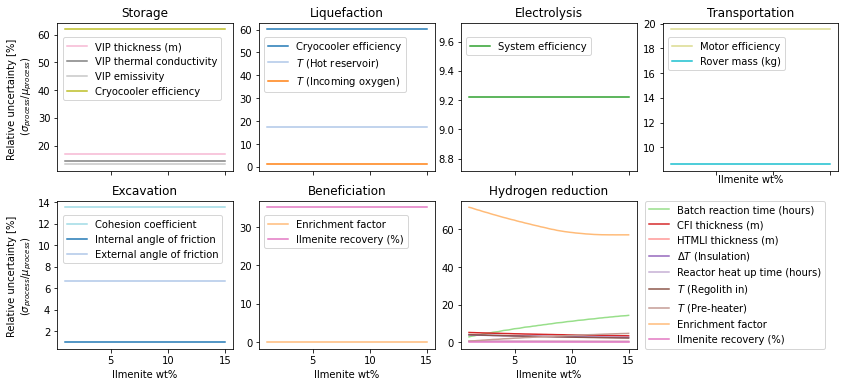

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14,6), sharex=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.15})
fig.delaxes(axs[1,3])
for i, ax in enumerate(axs.ravel()):
    if i == 7:
        break
    process_label = process_labels[i]
    process_index = process_indexes[i]

    for key in process_parameters[process_label]:
        label = find_new_label_name(key)
        color = find_label_color(key)
        mu = np.mean(monte_carlo_individual[key][0][:,process_index], axis=0)
        std = np.std(monte_carlo_individual[key][0][:,process_index], axis=0)
        ax.errorbar(ilmenite_wt, y=std/mu*100, label=label, color=color)
    
    if process_label == 'Hydrogen reduction':
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    else:
        ax.legend(loc='upper left', bbox_to_anchor=(.03, 0.9), borderaxespad=0.)
    ax.set_title(process_label)

axs[0,0].set_ylabel('Relative uncertainty [%] \n ($\sigma_{process}/\mu_{process}$) ')
axs[1,0].set_ylabel('Relative uncertainty [%] \n($\sigma_{process}/\mu_{process}$) ')
for _ in range(0,3):
    axs[1,_].set_xlabel('Ilmenite wt%')
axs[0,3].set_xlabel('Ilmenite wt%')
plt.savefig('systematics.png', dpi=300, bbox_inches='tight')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()

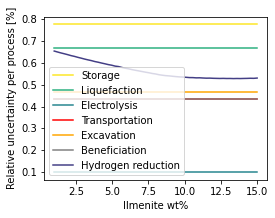

In [5]:
plt.figure(figsize=(4,3))
for l in range(0, 7):
    plt.errorbar(x=ilmenite_wt, y=monte_carlo_dict['energy_per_process_std'][l,:]/monte_carlo_dict['energy_per_process_mu'][l,:], label=process_labels[l], color=process_colors[l])
plt.legend()
plt.gca().set_xlabel('Ilmenite wt%')
plt.gca().set_ylabel('Relative uncertainty per process [%]')
plt.savefig('systematics_per_process.png', dpi=300, bbox_inches='tight')
plt.show()

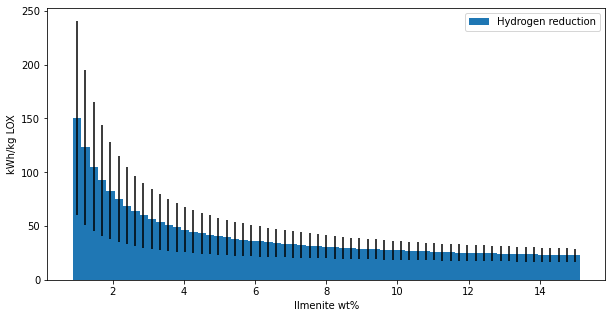

In [6]:

plt.figure(figsize=(10,5))
plt.bar(x=ilmenite_wt, height=monte_carlo_dict['energy_w_ilmenite_mu'], yerr=monte_carlo_dict['energy_w_ilmenite_std'],  label=process_labels[l], color='C0', width=0.25)
plt.legend()
plt.gca().set_xlabel('Ilmenite wt%')
plt.gca().set_ylabel('kWh/kg LOX')
plt.savefig('systematics_per_process.png', dpi=300, bbox_inches='tight')
plt.show()

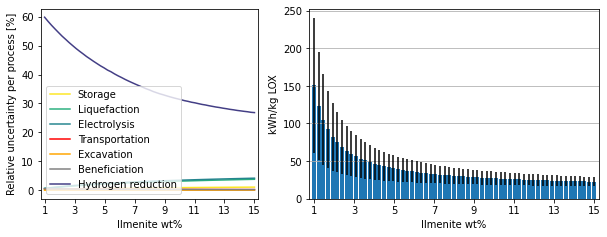

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3.5), gridspec_kw={'width_ratios': [1.5, 2]})

for l in range(0, 7):
    ax[0].errorbar(x=ilmenite_wt, y=monte_carlo_dict['energy_per_process_std'][l,:]/monte_carlo_dict['energy_w_ilmenite_mu'][:]*100, label=process_labels[l], color=process_colors[l])
ax[0].legend(loc='lower left')
ax[0].set_xlabel('Ilmenite wt%')
ax[0].set_ylabel('Relative uncertainty per process [%]')
#plt.savefig('systematics_per_process.png', dpi=300, bbox_inches='tight')
ax[0].set_xticks([1,3,5,7,9,11,13,15])
ax[0].set_xlim((0.75, 15.25))

ax[1].bar(x=ilmenite_wt, height=monte_carlo_dict['energy_w_ilmenite_mu'], yerr=monte_carlo_dict['energy_w_ilmenite_std'],  label=process_labels[l], color='C0', width=0.2)
#ax[1].legend()
ax[1].set_xlabel('Ilmenite wt%')
ax[1].set_ylabel('kWh/kg LOX')
ax[1].grid(axis='y')
ax[1].set_xticks([1,3,5,7,9,11,13,15])
ax[1].set_xlim((0.75, 15.25))
plt.savefig('results_w_systematics.png', dpi=300, bbox_inches='tight')
plt.show()